# Лабораторная работа 6. Машинное  обучение  Scikit-learn

Загрузите дата-сет из файла data.xlsx.


In [26]:
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_excel('data.xlsx',index_col=0)

Исправьте прочерки в некоторых ячейках. 

In [27]:
df = df.replace('-',0)

features = ['Количество купленных на матч билетов',
            'Дома или в гостях',
            'Место команды соперника в турнирной таблице выше середины или ниже',
            'Количество проведённых матчей за последнюю неделю',
            'Выиграли или проиграли предыдущую игру',
            'Положительная или отрицательная статистика игр с этой командой',
            'Данную игру выиграли или проиграли',
            'Играл или нет игрок Трус',
            'Коршунов',
            'Бадун',
            'Лисичкин',
            'Боярчук',
            'Жидких',
            'Марковский',
            'Дорофеев',
            'Ментюк',
            'Пасют',
            'Лаакконен',
            'Широков',
            'Марченко',
            'Ремезов',
            'А.Малявко',
            'С.Малявко',
            'Дадонов',
            'Степанов',
            'Шевченко',
            'Казнадей',
            'Осипов',
            'Саманьков',
            'Грецкий',
            'Кислый',
            'Горбаченко',
            'Безайс',
            'Брикун',
            'Стефанович',
]
df.columns = features

x_test = df.tail(1).drop(columns=['Данную игру выиграли или проиграли'])
df = df[:-1]
df.head()

Количество купленных на матч билетов  Дома или в гостях  \
Матч                                                            
1                                     1130                  0   
2                                      700                  0   
3                                     1557                  1   
4                                     1010                  1   
5                                     1209                  1   

      Место команды соперника в турнирной таблице выше середины или ниже  \
Матч                                                                       
1                                                     0                    
2                                                     0                    
3                                                     0                    
4                                                     0                    
5                                                     0                    

      Количество проведённых матчей за последнюю неделю  \
Матч                                                      
1                                                     0   
2                                                     1   
3                                                     2   
4                                                     2   
5                                                     3   

      Выиграли или проиграли предыдущую игру  \
Матч                                           
1                                          0   
2                                          1   
3                                          0   
4                                          1   
5                                          1   

      Положительная или отрицательная статистика игр с этой командой  \
Матч                                                                   
1                                                     0                
2                                                     0                
3                                                     0                
4                                                     0                
5                                                     1                

      Данную игру выиграли или проиграли  Играл или нет игрок Трус  Коршунов  \
Матч                                                                           
1                                    1.0                         1         1   
2                                    0.0                         1         1   
3                                    1.0                         0         1   
4                                    1.0                         1         1   
5                                    1.0                         1         1   

      Бадун  ...  Шевченко  Казнадей  Осипов  Саманьков  Грецкий  Кислый  \
Матч         ...                                                           
1         1  ...         1         1       0          0        0       0   
2         1  ...         1         1       0          0        0       0   
3         1  ...         1         1       1          1        0       0   
4         1  ...         1         1       0          0        1       0   
5         1  ...         1         1       0          0        1       0   

      Горбаченко  Безайс  Брикун  Стефанович  
Матч                                          
1              0       0       0           0  
2              0       0       0           0  
3              0       0       0           0  
4              0       0       0           0  
5              0       0       0           0  

[5 rows x 35 columns]

Теперь создадим y и X для тренировки моделей: y (выигрыш\проигрыш) - то, что будем предсказывать, X (все остальные переменые) - по чему будем предсказывать. 

In [28]:
y = df['Данную игру выиграли или проиграли']
X = df.drop(columns=['Данную игру выиграли или проиграли'])

Создадим список с моделями, которые будем тестировать и потренируем их. Используем первые 24 строки. В 25й строке записан проверочный тест. 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression().fit(X, y)
lr_pred = lr.predict(x_test)

rfc = RandomForestClassifier().fit(X, y)
rfc_pred = rfc.predict(x_test)

gbc = GradientBoostingClassifier().fit(X, y)
gbc_pred = gbc.predict(x_test)

nbc = GaussianNB().fit(X, y)
nbc_pred = nbc.predict(x_test)

knc = KNeighborsClassifier().fit(X, y)
knc_pred = knc.predict(x_test)

print("Оценка логистической регрессии - {}%. Результат прогноза - {}".format(lr.score(X, y) * 100,lr_pred[0]))
print("Класификатор случайного леса - {}%. Результат прогноза - {}".format(rfc.score(X, y) * 100,rfc_pred[0]))
print("Класификатор повышения градиента - {}%. Результат прогноза - {}".format(gbc.score(X, y) * 100,gbc_pred[0]))
print("GaussianNB - {}%. Результат прогноза - {}".format(nbc.score(X, y) * 100,nbc_pred[0]))
print("KNeighbors - {}%. Результат прогноза - {}".format(knc.score(X, y) * 100,knc_pred[0]))

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Оценка логистической регрессии - 87.5%. Результат прогноза - 1.0
Класификатор случайного леса - 91.66666666666666%. Результат прогноза - 1.0
Класификатор повышения градиента - 100.0%. Результат прогноза - 0.0
GaussianNB - 91.66666666666666%. Результат прогноза - 1.0
KNeighbors - 87.5%. Результат прогноза - 1.0


Далее выведем кривые-ошибок.

In [30]:
%matplotlib inline

import numpy as np
from sklearn.model_selection import validation_curve


def plot_validation_curve(estimator, param_name="C",
                          title='', param_range=np.linspace(0.1, 35, 5)):
    plt.figure(figsize=(8, 7))
    plt.title(title)
    plt.xlabel("Этапы обучения")
    plt.ylabel("Оценка")
    
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.ylabel("Оценка")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Учебная оценка",
             color="red", lw=lw)
    # fill out the space between mean and actual score values (deviation)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="red", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Перекрестная проверка",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid()
    return plt

In [19]:
plot_validation_curve(lr, 'C', 'Логистическая регрессия')
plt.show()

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


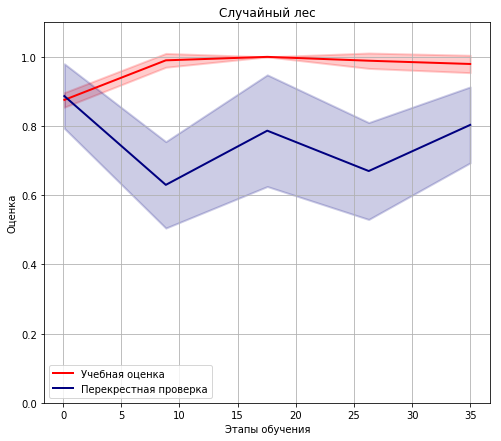

In [20]:
plot_validation_curve(rfc, 'max_depth', 'Cлучайный лес')
plt.show()

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


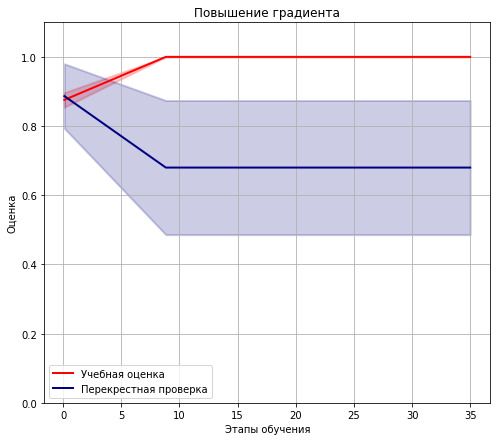

In [21]:
plot_validation_curve(gbc, 'max_depth', 'Повышение градиента')
plt.show()

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


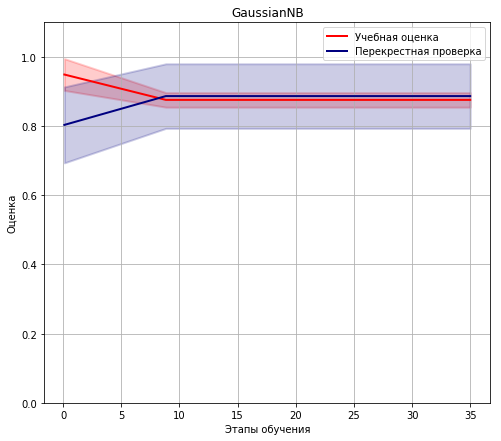

In [22]:
plot_validation_curve(nbc, 'var_smoothing', 'GaussianNB')
plt.show()

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


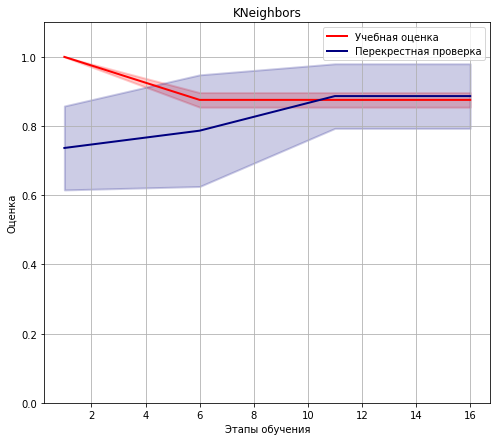

In [23]:
plot_validation_curve(knc, 'n_neighbors', 'KNeighbors', param_range=np.arange(1, 18, 5))
plt.show()

Сделайте вывод. 

Сделаю функцию, которая будет выводить 100% stacked bar chart, чтобы увидеть тенденции. 

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


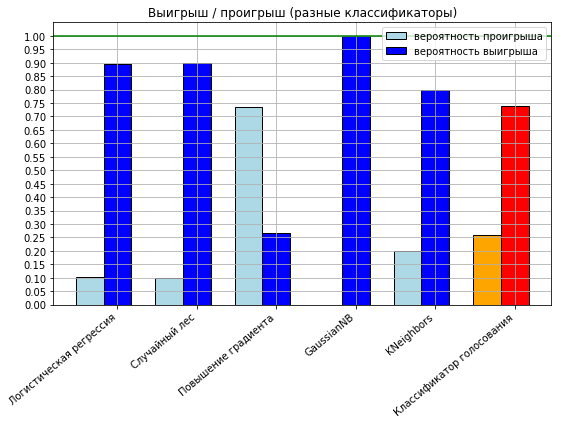

In [31]:
from sklearn.ensemble import VotingClassifier


def plot_stacked_bar_chart(estimators, weights, headers):
    vc = VotingClassifier(estimators=estimators,
                          weights=weights,
                          voting='soft').fit(X, y)

    plot_estimators = [estim[1] for estim in estimators]
    plot_estimators.append(vc)
    headers.append('Классификатор голосования')
    
    probs = [c.predict_proba(x_test) for c in plot_estimators]
    loss_probs = [pr[0, 0] for pr in probs]
    win_probs = [pr[0, 1] for pr in probs]

    num_estimators = len(plot_estimators)
    ind = np.arange(num_estimators)
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(8, 6))
    # bars for classifier 1-5
    p1 = ax.bar(ind, np.hstack(([loss_probs[:-1], [0]])), bar_width,
                color='lightblue', edgecolor='k')
    p2 = ax.bar(ind + bar_width, np.hstack(([win_probs[:-1], [0]])), bar_width,
                color='blue', edgecolor='k')
    # bars for VotingClassifier
    p3 = ax.bar(ind, [0, 0, 0, 0, 0, loss_probs[-1]], bar_width,
                color='orange', edgecolor='k')
    p4 = ax.bar(ind + bar_width, [0, 0, 0, 0, 0, win_probs[-1]], bar_width,
                color='red', edgecolor='k')
    # plot annotations
    plt.axhline(1, color='green')
    ax.yaxis.set_ticks(np.arange(0, 1.05, 0.05))
    ax.set_xticks(ind + bar_width)
    ax.set_xticklabels(headers,
                       rotation=40,
                       ha='right')
    plt.ylim([0, 1.05])
    plt.title('Выигрыш / проигрыш (разные классификаторы)')
    plt.legend([p1[0], p2[0]], ['вероятность проигрыша', 'вероятность выигрыша'], loc='best')
    plt.grid()
    plt.tight_layout()

    return plt

classes = [('lr', lr), ('rfc', rfc), ('gbc', gbc), ('nbc', nbc), ('knc', knc)]
plot_headers = ['Логистическая регрессия',
                'Случайный лес',
                'Повышение градиента',
                'GaussianNB',
                'KNeighbors'
               ]
weights = [1, 1, 1, 1, 1]

plot_stacked_bar_chart(estimators=classes, weights=weights, headers=plot_headers)
plt.show()

Вызовите функцию для каждой из ситуаций. 

1) Количество купленных на матч билетов 

2) Дома(1) или в гостях(0)

3) Место команды соперника в турнирной таблице выше середины(0) или ниже(1)

4) Количество проведённых матчей за последнюю неделю

5) Выиграли(1) или проиграли(0) предыдущую игру

6) Положительная(1) или отрицательная(0) статистика игр с этой командой

7) Данную игру выиграли(1) или проиграли (0)

8) Играл(1) или нет(0) игрок Выборочно, наиболее интересные


In [32]:
def get_col(coln):
    res = pd.DataFrame()
    try:
        if coln:
            res = df[coln]
    finally:
        return res

print(get_col('Количество купленных на матч билетов'),'\n')
print(get_col('Место команды соперника в турнирной таблице выше середины или ниже'),'\n')
print(get_col('Место команды соперника в турнирной таблице выше середины или ниже'),'\n')
print(get_col('Количество проведённых матчей за последнюю неделю'),'\n')
print(get_col('Выиграли или проиграли предыдущую игру'),'\n')
print(get_col('Положительная или отрицательная статистика игр с этой командой'),'\n')
print(get_col('Данную игру выиграли или проиграли'),'\n')
print(get_col('Боярчук'),'\n')

Матч
1     1130
2      700
3     1557
4     1010
5     1209
6      561
7      150
8     1500
9      119
10     580
11    1204
12     680
13     810
14     228
15    2380
16     500
17     180
18    4850
19    1142
20    1003
21     793
22     652
23     676
24    1100
Name: Количество купленных на матч билетов, dtype: int64 

Матч
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    0
24    0
Name: Место команды соперника в турнирной таблице выше середины или ниже, dtype: int64 

Матч
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    0
24    0
Name: Место команды соперника в турнирной таблице выше середины или ниже, dtype: int64 

Матч
1     0
2     1
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    2
11    1
12    2

Сделайте вывод для каждого. 

Учитывая незначительные критерии, изменим формулу для создания тестовых и тренировочных сетов, обучим модели заново и сравним с первыми.

In [33]:
df = pd.read_excel('data.xlsx',index_col=0)
df = df.replace('-',0)
df.columns = features

for value in [0,1]:
    df = df.loc[:, (df != value).any()] # skip features with zeros or ones only
df = df[df.columns[df.max() < 2]] # skip integer features

x_test = df.tail(1).drop(columns=['Данную игру выиграли или проиграли'])
df = df[:-1] 
y = df['Данную игру выиграли или проиграли']
X = df.drop(columns=['Данную игру выиграли или проиграли'])

lr = LogisticRegression().fit(X, y)
lr_pred = lr.predict(x_test)

rf = RandomForestClassifier().fit(X, y)
rf_pred = rf.predict(x_test)

gb = GradientBoostingClassifier().fit(X, y)
gb_pred = gb.predict(x_test)

nbc = GaussianNB().fit(X, y)
nbc_pred = nbc.predict(x_test)

knc = KNeighborsClassifier().fit(X, y)
knc_pred = knc.predict(x_test)

print("Оценка логистической регрессии - {}%. Результат прогноза - {}".format(lr.score(X, y) * 100,lr_pred[0]))
print("Класификатор случайного леса - {}%. Результат прогноза - {}".format(rf.score(X, y) * 100,rf_pred[0]))
print("Класификатор повышения градиента - {}%. Результат прогноза - {}".format(gb.score(X, y) * 100,gb_pred[0]))
print("GaussianNB - {}%. Результат прогноза - {}".format(nbc.score(X, y) * 100,nbc_pred[0]))
print("KNeighbors - {}%. Результат прогноза - {}".format(knc.score(X, y) * 100,knc_pred[0]))

Оценка логистической регрессии - 87.5%. Результат прогноза - 1.0
Класификатор случайного леса - 100.0%. Результат прогноза - 1.0
Класификатор повышения градиента - 100.0%. Результат прогноза - 1.0
GaussianNB - 91.66666666666666%. Результат прогноза - 1.0
KNeighbors - 87.5%. Результат прогноза - 1.0


c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Вывод.

Подайте на функцию 25й проверочный тест. Запишите результат. 